In [1]:
# 读取数据集，这里是直接联网读取，也可以通过下载文件，再读取
import pandas as pd
import matplotlib.pyplot as plt

data_dir = 'https://mirror.coggle.club/dataset/coggle-competition/'
train_data = pd.read_csv(data_dir + 'intent-classify/train.csv', sep='\t', header=None)
test_data = pd.read_csv(data_dir + 'intent-classify/test.csv', sep='\t', header=None)

In [ ]:
- pandas：数据读取、统计
- matplotlib：可视化
- jieba：中文分词
- wordcloud：绘制云图

In [3]:
test_data

,0
0,回放CCTV2的消费主张
1,给我打开玩具房的灯
2,循环播放赵本山的小品相亲来听
3,15号上午10点带孩子去海洋馆的行程帮我制定下。
4,把智能扫地机器人关掉
...,...
2995,是否能找一首2019年的抖音歌曲播放下呢
2996,下午三点有哪个台放大话西游吗帮我看下
2997,随机播放一首古筝弹奏的曲子可以吗
2998,美食纪录片螃蟹的征途给我找一下


In [4]:
train_data[1].value_counts()
# 多分类的任务 样本分布均衡

1
FilmTele-Play            1355
Video-Play               1334
Music-Play               1304
Radio-Listen             1285
Alarm-Update             1264
Weather-Query            1229
Travel-Query             1220
HomeAppliance-Control    1215
Calendar-Query           1214
TVProgram-Play            240
Audio-Play                226
Other                     214
Name: count, dtype: int64

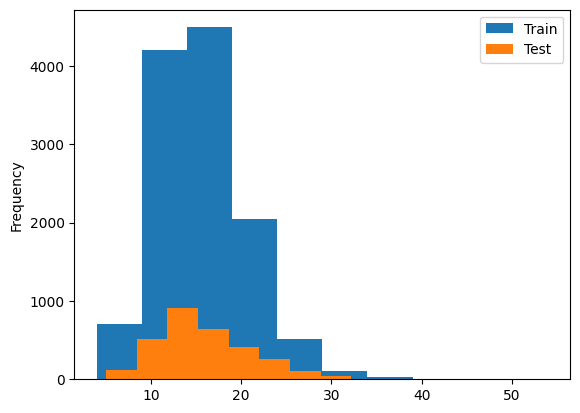

In [3]:
# 文本字符个数统计
train_data[0].apply(len).plot(kind='hist')
test_data[0].apply(len).plot(kind='hist')

plt.legend(['Train', 'Test'])

In [4]:
train_data[0].apply(len).describe()

count    12100.000000
mean        15.138678
std          4.872583
min          4.000000
25%         12.000000
50%         15.000000
75%         18.000000
max         54.000000
Name: 0, dtype: float64

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.607 seconds.
Prefix dict has been built successfully.


([], [])

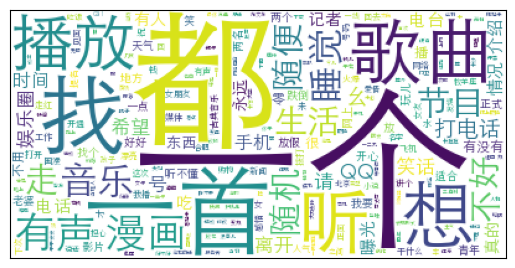

In [5]:
# pip install wordcloud jieba
from wordcloud import WordCloud  
import matplotlib.pyplot as plt
import jieba

# 中文分词
content = ''.join(train_data[train_data[1] == 'Other'][0])
words = jieba.lcut(content)

# 读取中文停用词
cn_stopwords = ' '.join(pd.read_csv('https://mirror.coggle.club/stopwords/baidu_stopwords.txt', header=None)[0])
words = [x for x in words if x not in cn_stopwords]

# 中文字体，https://mirror.coggle.club/STHeiti-Light.ttc
# 如果不设置，云图不能展示中文
wordcloud = WordCloud(background_color = 'white', max_words = 1000, font_path = 'STHeiti-Light.ttc')
wordcloud.generate(' '.join(words))
plt.imshow(wordcloud)
plt.xticks([]); plt.yticks([])